
<div align="center">
  <h1>Clustering Using GMM, KMeans, and
DBSCAN</h1>
</div>

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df.drop(columns='species')
features = pca.fit_transform(X)

<Axes: xlabel='0', ylabel='1'>

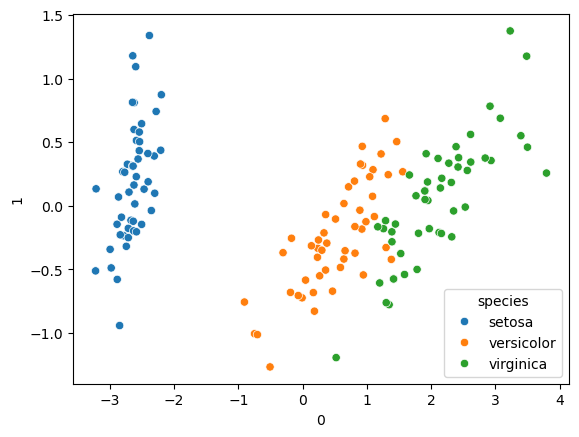

In [3]:
import pandas as pd
features_df = pd.DataFrame(features, columns=['0'
, '1'])
sns.scatterplot(features_df, x=features_df['0'], y=features_df['1'],
hue=df.species)

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(features_df)
gmm_cluster = gmm.predict(features_df)

<Axes: xlabel='0', ylabel='1'>

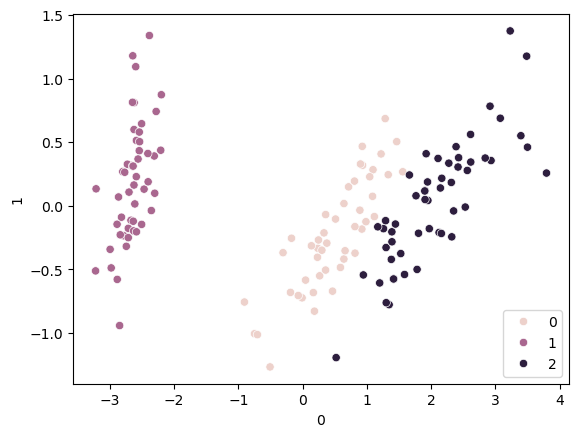

In [5]:
sns.scatterplot(features_df, x=features_df['0'], y=features_df['1'],
hue=gmm_cluster)

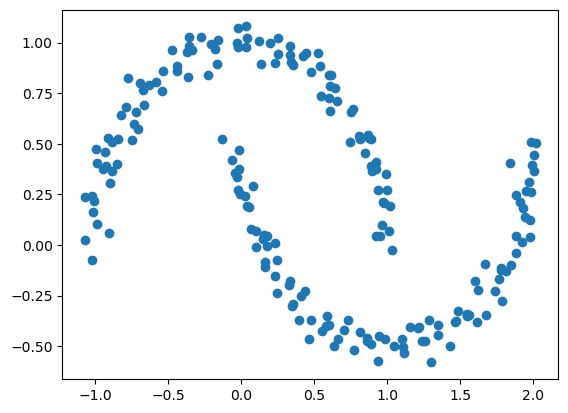

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

/Users/rahulallamraju/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


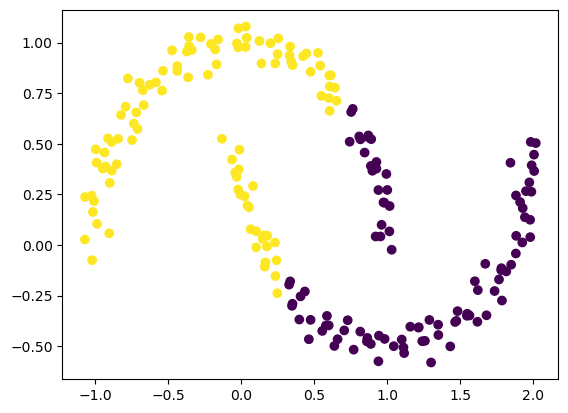

In [7]:
from sklearn.cluster import KMeans, DBSCAN
kmeans = KMeans(n_clusters=2, random_state=786)
kmeans.fit(Xmoon)
kmeans_clusters = kmeans.predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=kmeans_clusters, cmap='viridis')

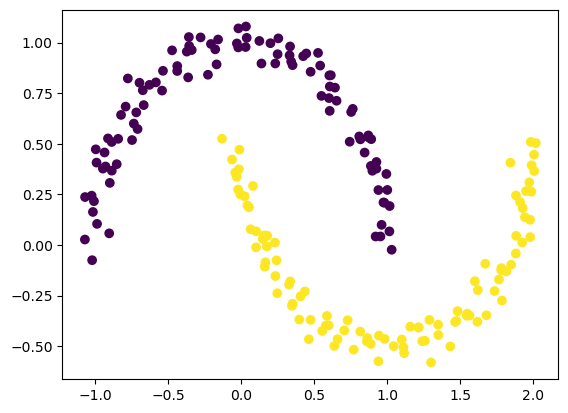

In [8]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(Xmoon)
dbscan_clusters = dbscan.labels_
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=dbscan_clusters, cmap='viridis')